## EDA and Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import numpy.random as rnd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [4]:
rnd.seed(42)

In [5]:
data=pd.read_csv('housing.csv')

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Ocean Proximity** is a categorical variable. Let's see what values it contain.

In [8]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

**ISLAND** has only 5 entries. I'll be adding these to other class in subsequent stages (in GetDummies class)

In [9]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


C:\Users\Diogo\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Diogo\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Diogo\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Diogo\AppData\Roaming\Python\Python

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF6548FF08>,
      dtype=object)

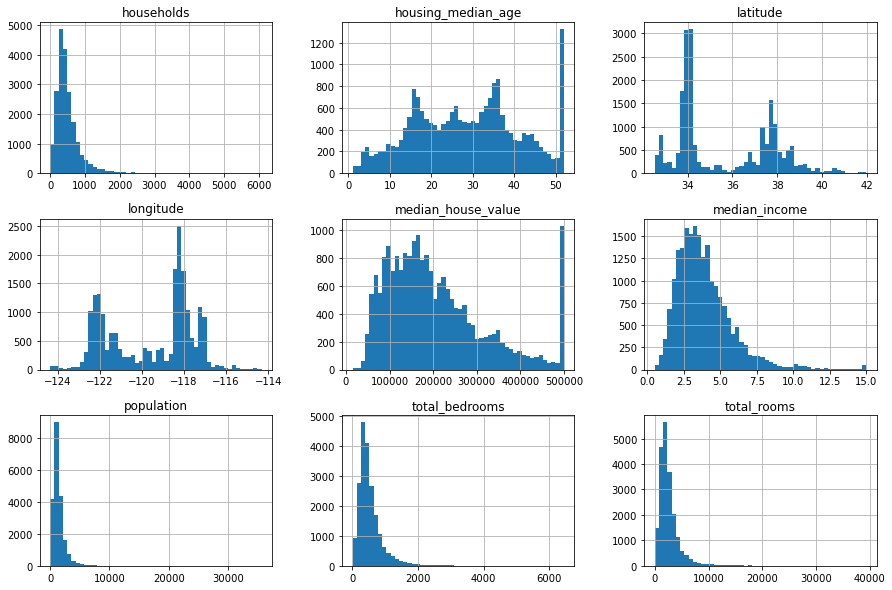

In [10]:
data.hist(bins=50,figsize=(15,10))

From above histograms it's clear that most of the features are skewed.
It seems that **housing_median_age and median_housing_value** have been capped a the end (Peak at the end).

### Getting test dataset
* Used Stratified sampling technique
* Defined a new feature income_cat which is income category and used if for sampling

In [11]:
data['income_cat']=np.ceil(data['median_income']/1.5)
data['income_cat'].where(data['income_cat']<5,5.0,inplace=True)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(data,data['income_cat']):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]

In [14]:
strat_train_set.drop('income_cat',axis=1,inplace=True)
strat_test_set.drop('income_cat',axis=1,inplace=True)

In [15]:
strat_train_set.to_csv("strat_train_set.csv",index=False)
strat_test_set.to_csv("strat_test_set.csv",index=False)

## Exploratory Data Analysis

In [16]:
data=pd.read_csv('strat_train_set.csv')
#data.drop('Unnamed: 0',axis=1,inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


Text(0.5, 1.0, 'Distribution of households')

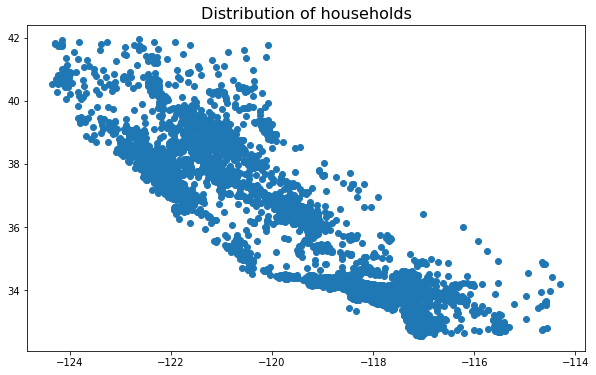

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['longitude'],y=data['latitude'])
plt.title("Distribution of households",size=16)

By setting alpha=0.1, we can see high density areas.

Text(0.5, 1.0, 'Distribution of households')

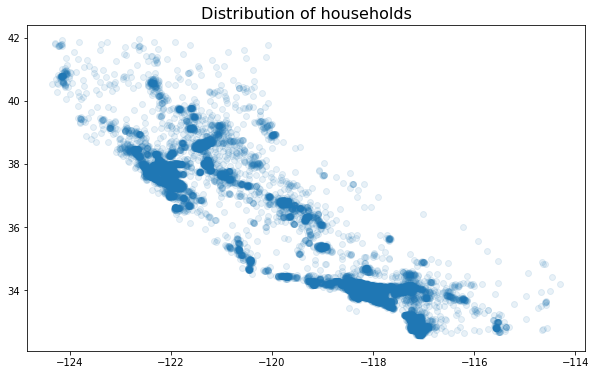

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.1)
plt.title("Distribution of households",size=16)

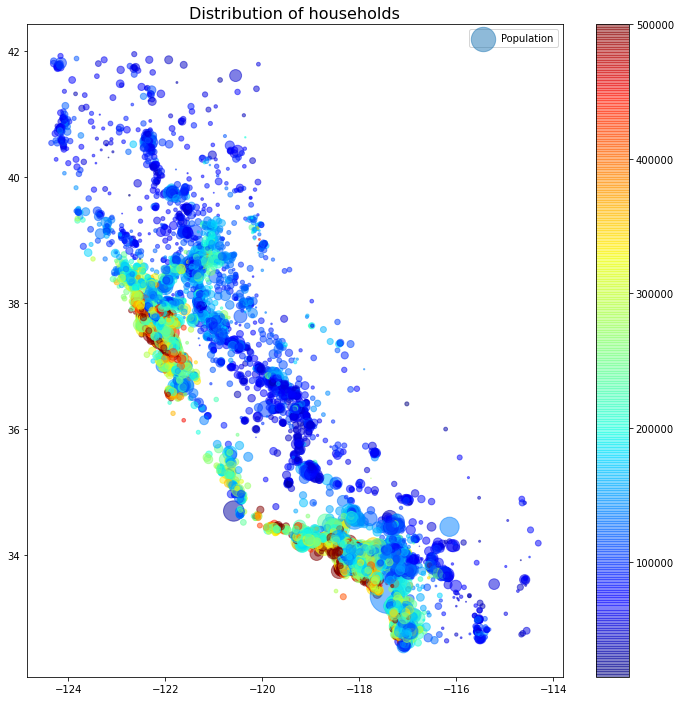

In [21]:
plt.figure(figsize=(12,12))


plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.5,s=data['population']/30,c=data['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

From above plot we can infer that,
1. Housing prices are much related to location and population density.
2. Housing prices near ocean are higher except in northern california.

Now, see the correlation of 'medial house value' with other columns.
This is Pearson's correlation coefficient.

In [22]:
corr_matrix=data.corr()

In [23]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

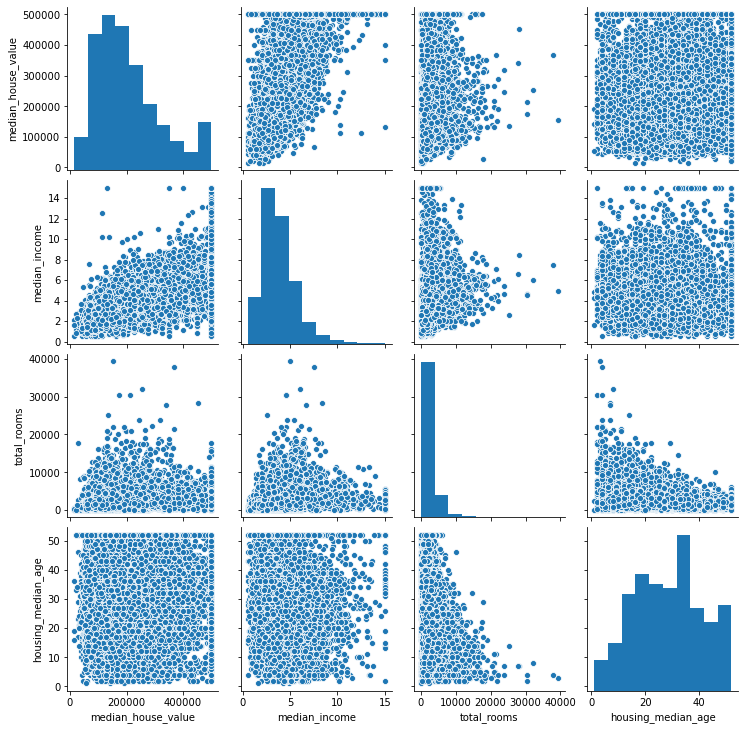

In [24]:
sns.pairplot(data[['median_house_value','median_income','total_rooms','housing_median_age']])

**Median Income** is the most promising attribute to get **Median Hosung Price**

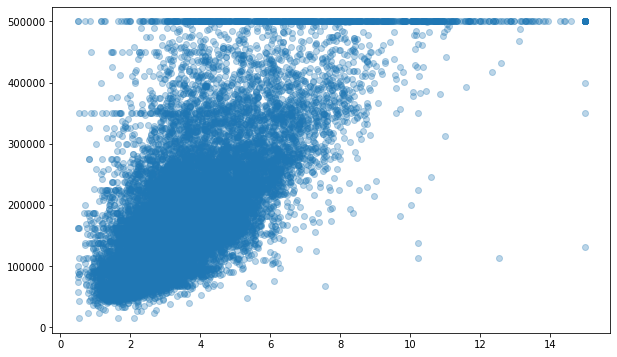

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(y=data['median_house_value'],x=data['median_income'],alpha=0.3)

A clear line can be seen at 500k at which the data is capped.
Similar lines can be seen around 450k,350k.
This kind of data may degrade the performance of model.

### Creating new features:
1. rooms per household
2. bedrooms per room
3. population per household

Initially creating them on a copy of dataset and checing whether they are making any difference.

In [26]:
data1=data.copy()

In [27]:
data1['rooms_per_household']=data1['total_rooms']/data1['households']
data1['bedrooms_per_room']=data1['total_bedrooms']/data1['total_rooms']
data1['population_per_household']=data1['population']/data1['households']

In [28]:
data1.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395


In [29]:
corr_matrix=data1.corr()

In [30]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

It is clear that **rooms_per_household** and **bedrooms_per_room** have better correlation with **median_house_value** than **total_rooms** and **total_bedrooms**.

I have created classes for vindividual data manupulation job so that I can add then into a pipeline

In [31]:
class FeaturesAdder(BaseEstimator,TransformerMixin):
    """This class adds new features in the dataset.
        Features added are : rooms_per_household, bedrooms_per_room, and population_per_household.
    """
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X['rooms_per_household']=X['total_rooms']/X['households']
        X['bedrooms_per_room']=X['total_bedrooms']/X['total_rooms']
        X['population_per_household']=X['population']/X['households']
        return X


### Null Value Imputation

In [32]:
#Get number of Null Values
def get_null_count(data):
    for i in data.columns:
        print(i,': ',len(data[data[i].isnull()][i]))

In [33]:
get_null_count(data)

longitude :  0
latitude :  0
housing_median_age :  0
total_rooms :  0
total_bedrooms :  158
population :  0
households :  0
median_income :  0
median_house_value :  0
ocean_proximity :  0


In [34]:
data_null=data[data['total_bedrooms'].isnull()]

Plotting null values to check for any patterns.

For example: whether all nulls are concentrated in region or not

No handles with labels found to put in legend.


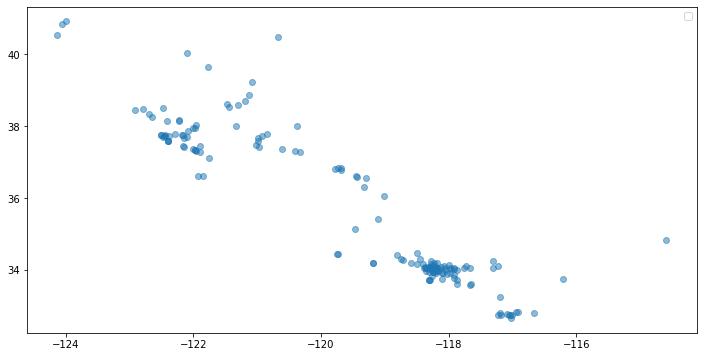

In [35]:
plt.figure(figsize=(12,6))
plt.scatter(x=data_null['longitude'],y=data_null['latitude'],alpha=0.5)
plt.legend()

There is not any specific pattern in null values except a dense spot near -118 longitude

Then, plotted histograms of columns with null values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF6894C5C8>]],
      dtype=object)

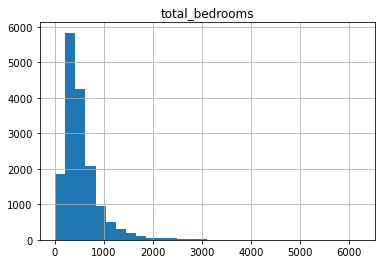

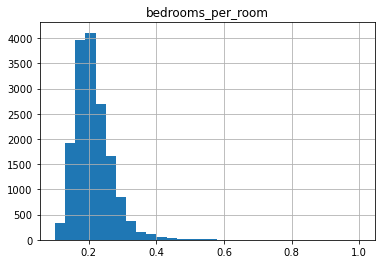

In [36]:
data1.hist(column='total_bedrooms',bins=30)
data1.hist(column='bedrooms_per_room',bins=30)

As the distributions of **total_bedrooms** and **bedrooms_per_room** are skewed, it's better to replace null values by **median**.
I have used sklearn's Imputer to do this job

### Removing outliers

In [37]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

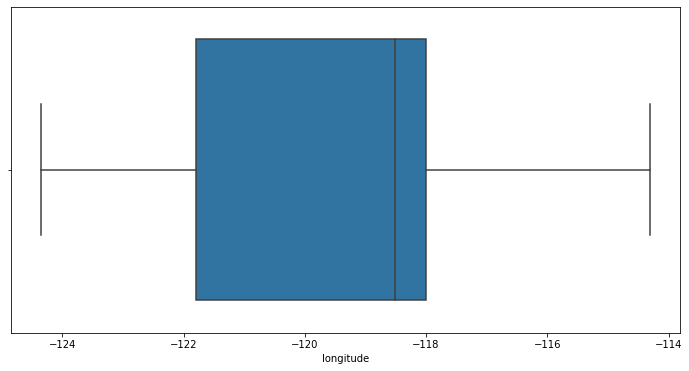

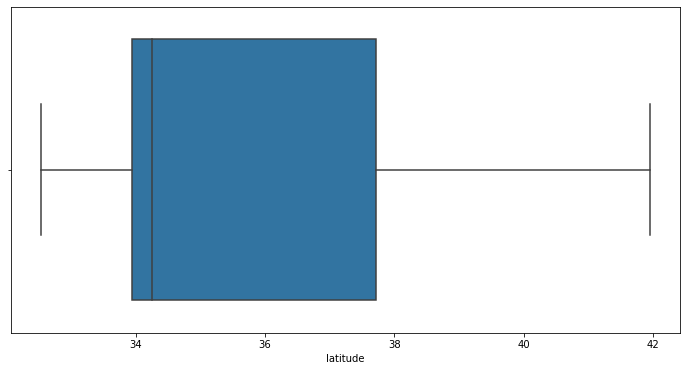

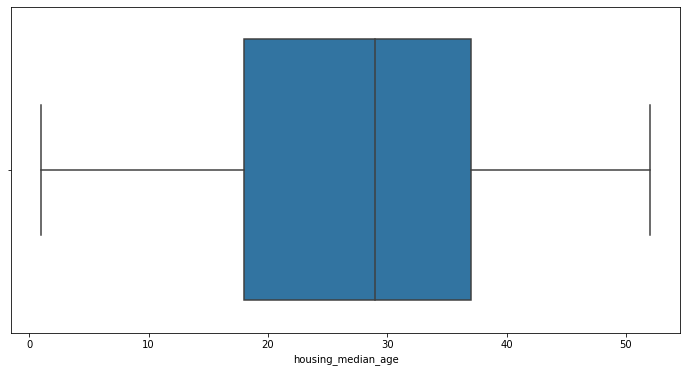

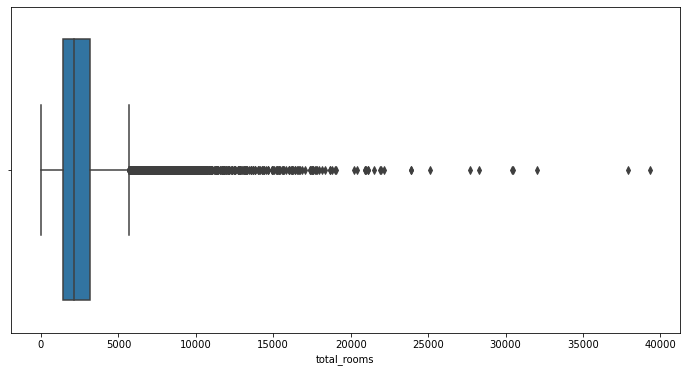

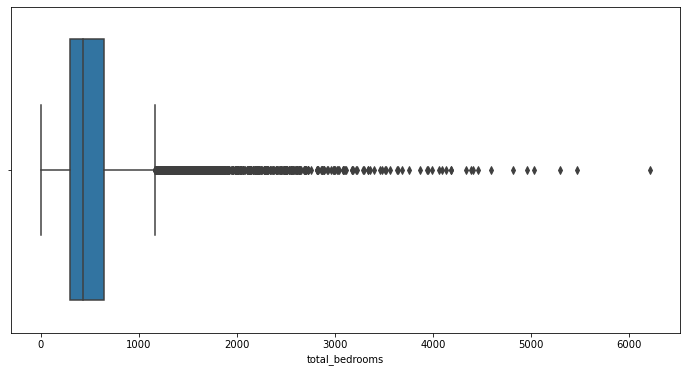

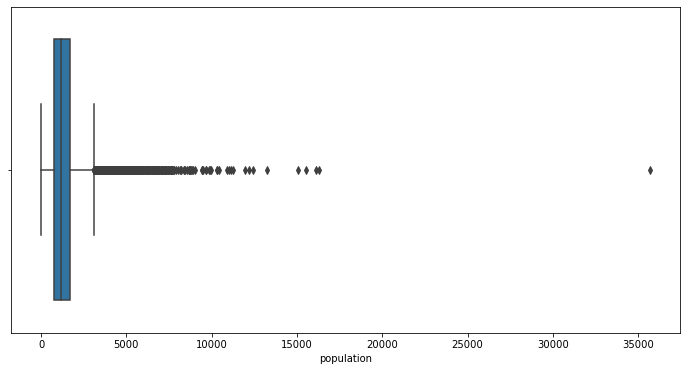

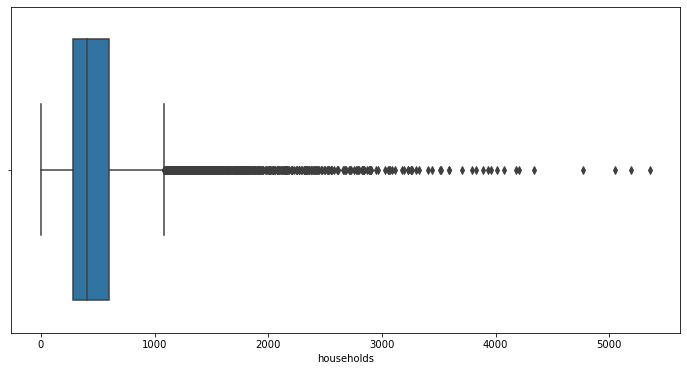

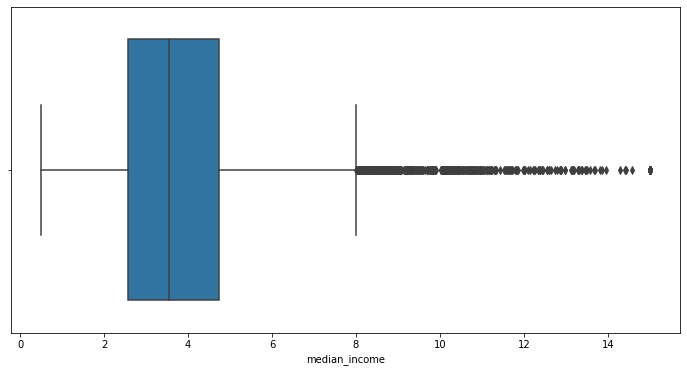

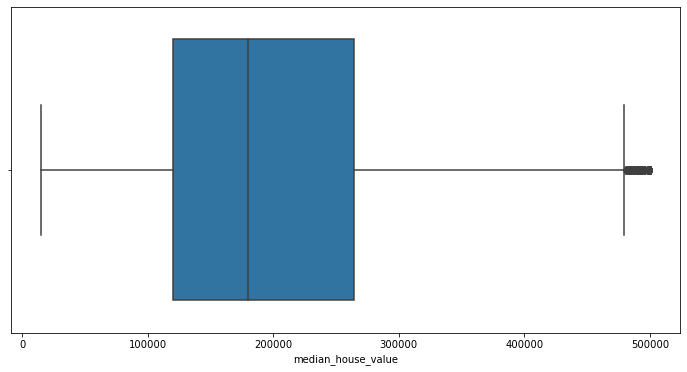

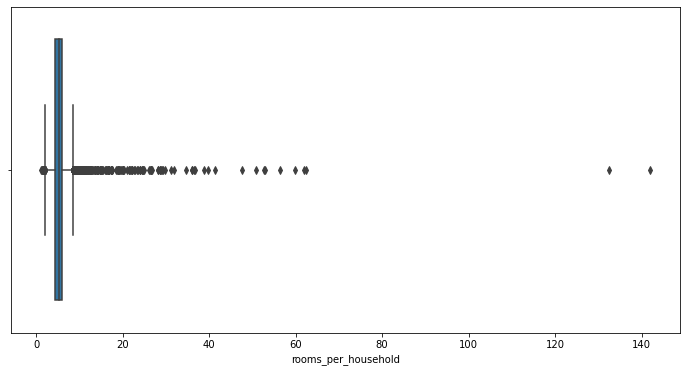

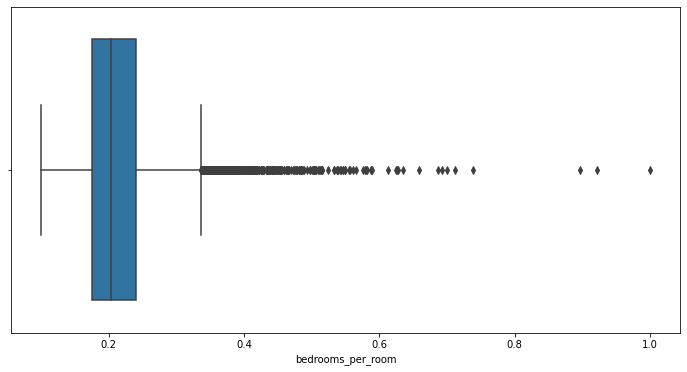

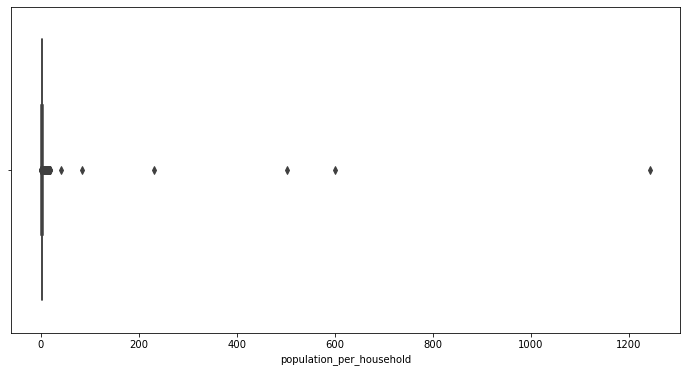

In [38]:
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=data1,ax=ax)


By studying above box plots in details (I've not mentioned that in this notebook) as well as scatter plot of Median_House_Value vs. Median_Income, I decided following conditions to remove outliers.

I also used Tableau to get interactive plots

In [39]:
class RemoveOutliers(BaseEstimator,TransformerMixin):
    """This class removes outliers from data.
    Note: Outlier values are hard coded
    """
    def fit (self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X=X[(X['median_house_value']!=500001) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[X['median_income']<=11].reset_index(drop=True)
        X=X[(X['median_house_value']!=350000) | (X['median_income']>=1.5)].reset_index(drop=True)
        X=X[(X['median_house_value']!=450000) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[(X['median_house_value']>=350000) | (X['median_income']<=9.5)].reset_index(drop=True)
        X=X[X['population']<=9000]
        X=X[(X['population_per_household']>=1.15) & (X['population_per_household']<=6.5)]
        X=X[X['rooms_per_household']<20]
        X=X[X['bedrooms_per_room']<0.5].reset_index(drop=True)
        return X

In [40]:
data1=RemoveOutliers().fit_transform(data1)

In [41]:
data_labels=data1['median_house_value']
data1=data1.drop('median_house_value',axis=1)

### Transforming skewed features

C:\Users\Diogo\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Diogo\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Diogo\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Diogo\AppData\Roaming\Python\Python

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF69CAF808>,
      dtype=object)

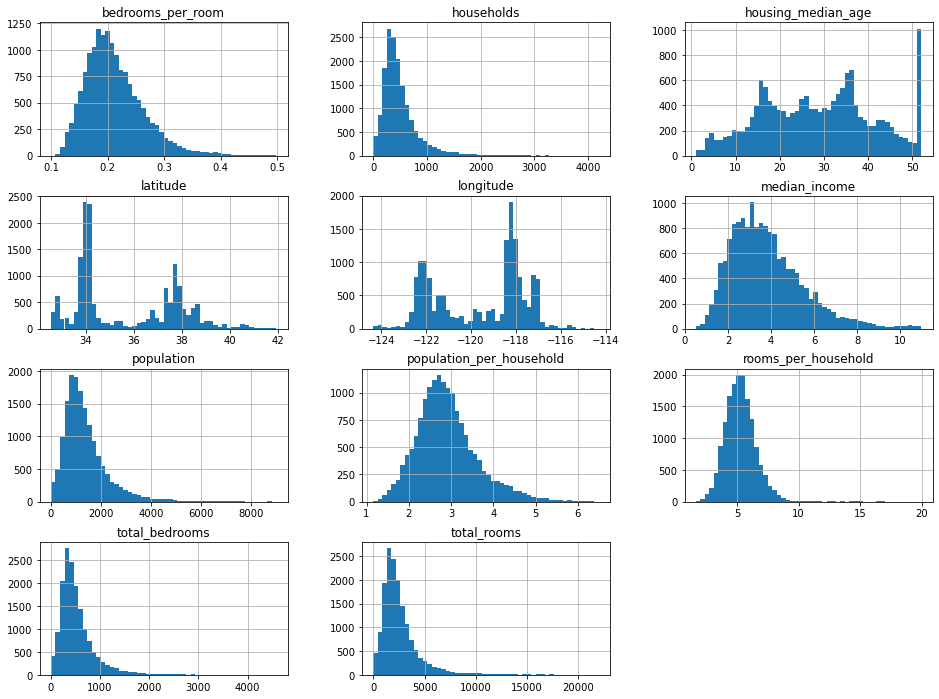

In [42]:
data1.hist(bins=50,figsize=(16,12))

In [43]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

Get **skewness** of features

In [44]:
skewness=[]
for i in num_features:
    skewness.append(data1[i].skew())
pd.DataFrame(data=skewness,index=num_features,columns=['skewness']).sort_values(by='skewness',ascending=False)

,skewness
total_rooms,2.902649
total_bedrooms,2.684070
households,2.629067
population,2.453927
rooms_per_household,2.168956
bedrooms_per_room,1.158469
median_income,1.051412
population_per_household,0.902046
latitude,0.462198
housing_median_age,0.061121


I transformed features using **log1p** and **boxcox1p** functions.

boxcox1p is used for highly skewed features

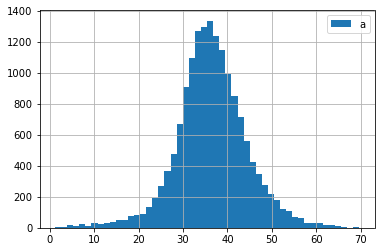

In [45]:
data1['households'].apply(lambda x: np.log1p(x)**2).hist(bins=50,label='a')
plt.legend()

In [46]:
class FeaturesTransformer(BaseEstimator,TransformerMixin):
    """This class trnsforms numberical featuress in the dataset.
    Note: Transformations are hard coded.
    """
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        import numpy as np
        from scipy.special import boxcox1p        
        X['total_rooms']=X['total_rooms'].apply(lambda x: boxcox1p(x,0.25))
        X['total_bedrooms']=X['total_bedrooms'].apply(lambda x: boxcox1p(x,0.25))
        X['households']=X['households'].apply(lambda x: boxcox1p(x,0.2))
        X['population']=X['population'].apply(lambda x: boxcox1p(x,0.3))
        X['rooms_per_household']=X['rooms_per_household'].apply(lambda x: np.log1p(x)**0.5)
        X['bedrooms_per_room']=X['bedrooms_per_room'].apply(lambda x: np.log1p(x)**0.25)
        X['median_income']=X['median_income'].apply(lambda x: np.log1p(x)**1.25)
        X['population_per_household']=X['population_per_household'].apply(lambda x: np.log1p(x)**1)
        return X

In [47]:
data1=FeaturesTransformer().fit_transform(data1)

** Transformed features **

C:\Users\Diogo\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Diogo\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Diogo\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Diogo\AppData\Roaming\Python\Python

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF69F553C8>,
      dtype=object)

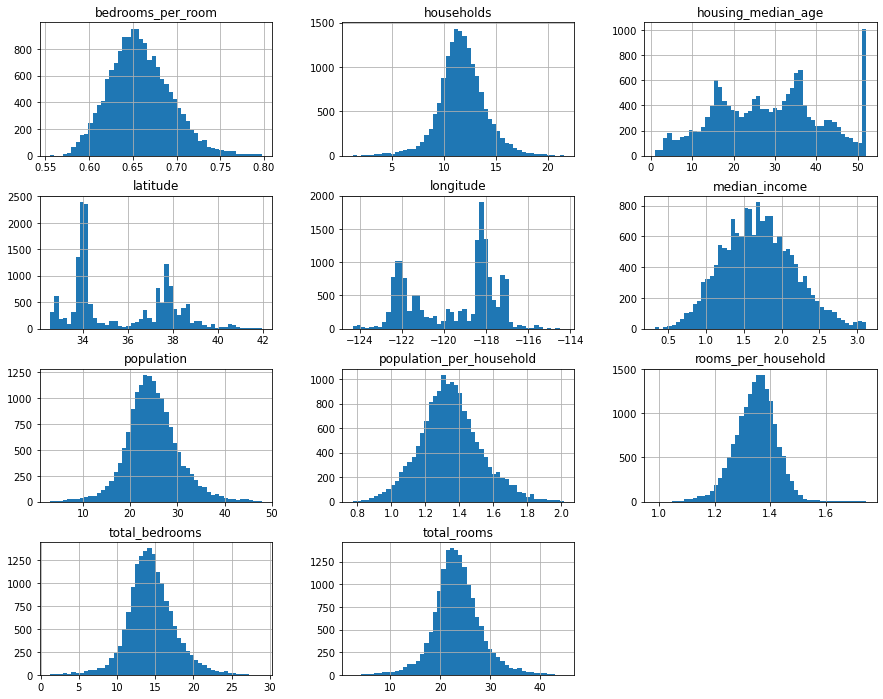

In [48]:
data1.hist(bins=50,figsize=(15,12))

### Getting dummy variables and Feature Scaling


In [51]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [52]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    """This class is a dataframe selector.
        Data members:
            features: A list of column_names you want in output dataframe
    """
    def __init__(self,features):
        self.features=features
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[self.features]

In [53]:
class GetDummies(BaseEstimator,TransformerMixin):
    """This class is used to get dummy columns from categorical columns."""
    def fit (self,X,y=None):
        return self
    def transform(self,X,y=None):
        #change ISLAND to NEAR BAY...as count of ISLAND is very low
        X[X=='ISLAND']='NEAR BAY'
        return (pd.get_dummies(X,drop_first=True))

In [54]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household','bedrooms_per_room', 'population_per_household']
cat_featues=['ocean_proximity']

In [56]:
num_pipeline=Pipeline([
    ('selector',DataFrameSelector(num_features)),
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

#Preparing categorical data
cat_pipeline=Pipeline([
    ('selector',DataFrameSelector(cat_featues)),
    ('get_dummies',GetDummies())
])

#Combining numerical and categorica data
data_cleaning_pipeline=FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
    
])

In [57]:
data1=data_cleaning_pipeline.fit_transform(data1)

C:\Users\Diogo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Diogo\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


Above pipeline returned an array. I converted it to dataframe again so that we can look at colums easily and do furthur processing.

In [58]:
l=num_features.copy()
l.extend([0,1,2])

In [59]:
data1=pd.DataFrame(data1,columns=l)

In [60]:
data1.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,0,1,2
0,-1.154224,0.772567,0.746370,-0.475425,-0.369225,-0.743301,-0.314063,-0.611150,-0.449849,0.334068,-1.207634,0.0,0.0,0.0
1,-1.174180,0.660361,-1.171019,-1.491029,-1.797235,-1.693043,-1.732155,1.464804,0.622682,-1.106072,-0.204224,0.0,0.0,0.0


**Scaling labels**

This is necessary for some machine learning algorithms

In [61]:
y=data_labels.copy()

In [62]:
label_scaler=StandardScaler()
data_labels=label_scaler.fit_transform(y.values.reshape(-1,1))

### Check for multicoliniearity

Here I have removed features having VIF (Variance Inflation Factor) greater than 5 and p-Values greater than 0.05
I have written following functions to do the job

In [63]:
def get_vif(X):
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return pd.Series(index=X.columns,data=l).sort_values(ascending=False)
            
def remove_by_pvalue(X,y,pvalue=0.05):
    """Remove features with p-value more than 'pvalue'
    
    This function uses statsmodels.api.OLS model. Please add intercept to data externally.
    Input:
        X: Array or dataframe excluding predicted variable
        y: Series or list of predicted variable
        pvalue: int or float
    
    Note:
        X is changed inplace
    """
    import statsmodels.api as sm
    for i in range(len(X.columns)):
        regressor_OLS=sm.OLS(endog=y,exog=X).fit()
        s=regressor_OLS.pvalues.sort_values(ascending=False)
        if s.iloc[0]>pvalue:
            X.drop(s.index[0],axis=1,inplace=True)
            print('Removed: ',s.index[0],'P-value: ',s.iloc[0])
        
def remove_by_vif(X,vif=5):
    """Remove columns from X whose VIF is greater than supplied 'vif'
    Parameters:
        X:array or dataframe containing data excluding target variable
        vif: int or float of limiting value of VIF
    Note:
        This function changes X inplace
    """
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
        
    for i in range(len(X.columns)):
        l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        s=pd.Series(index=X.columns,data=l).sort_values(ascending=False)
        if s.iloc[0]>vif:
            X.drop(s.index[0],axis=1,inplace=True)
            print('Removed: ',s.index[0],', VIF: ',s.iloc[0])
        else:
            break


Get VIFs of all features

In [64]:
get_vif(data1)

total_bedrooms              558.923558
households                  389.655010
total_rooms                 287.321351
population                  141.389762
bedrooms_per_room            66.260643
rooms_per_household          50.549888
population_per_household     19.548814
latitude                     18.347840
longitude                    17.347168
median_income                 3.027807
0                             2.022556
1                             1.449785
housing_median_age            1.374288
2                             1.223067
dtype: float64

In [65]:
remove_by_vif(data1)

Removed:  total_bedrooms , VIF:  558.9235579608114
Removed:  households , VIF:  228.1741365426593
Removed:  total_rooms , VIF:  108.34813434774779
Removed:  latitude , VIF:  18.337136881413034
Removed:  bedrooms_per_room , VIF:  5.6188187978709845


So, above 5 colums were removed because of VIF constraint

In [66]:
remove_by_pvalue(data1,data_labels)

No columns were removed by p-Value constraint

## Training Machine Learning Algorithms

In [67]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [68]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

class FeaturesAdder(BaseEstimator,TransformerMixin):
    """This class adds new features in the dataset.
        Features added are : rooms_per_household, bedrooms_per_room, and population_per_household.
    """
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X['rooms_per_household']=X['total_rooms']/X['households']
        X['bedrooms_per_room']=X['total_bedrooms']/X['total_rooms']
        X['population_per_household']=X['population']/X['households']
        return X


class RemoveOutliers(BaseEstimator,TransformerMixin):
    """This class removes outliers from data.
    Note: Outlier values are hard coded
    """
    def fit (self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X=X[(X['median_house_value']!=500001) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[X['median_income']<=11].reset_index(drop=True)
        X=X[(X['median_house_value']!=350000) | (X['median_income']>=1.5)].reset_index(drop=True)
        X=X[(X['median_house_value']!=450000) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[(X['median_house_value']>=350000) | (X['median_income']<=9.5)].reset_index(drop=True)
        X=X[X['population']<=9000]
        X=X[(X['population_per_household']>=1.15) & (X['population_per_household']<=6.5)]
        X=X[X['rooms_per_household']<20]
        X=X[X['bedrooms_per_room']<0.5].reset_index(drop=True)
        return X
    

class FeaturesTransformer(BaseEstimator,TransformerMixin):
    """This class trnsforms numberical featuress in the dataset.
    Note: Transformations are hard coded.
    """
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        import numpy as np
        from scipy.special import boxcox1p        
        X['total_rooms']=X['total_rooms'].apply(lambda x: boxcox1p(x,0.25))
        X['total_bedrooms']=X['total_bedrooms'].apply(lambda x: boxcox1p(x,0.25))
        X['households']=X['households'].apply(lambda x: boxcox1p(x,0.2))
        X['population']=X['population'].apply(lambda x: boxcox1p(x,0.3))
        X['rooms_per_household']=X['rooms_per_household'].apply(lambda x: np.log1p(x)**0.5)
        X['bedrooms_per_room']=X['bedrooms_per_room'].apply(lambda x: np.log1p(x)**0.25)
        X['median_income']=X['median_income'].apply(lambda x: np.log1p(x)**1.25)
        X['population_per_household']=X['population_per_household'].apply(lambda x: np.log1p(x)**1)
        return X
    

class DataFrameSelector(BaseEstimator,TransformerMixin):
    """This class is a dataframe selector.
        Data members:
            features: A list of column_names you want in output dataframe
    """
    def __init__(self,features):
        self.features=features
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[self.features]

class GetDummies(BaseEstimator,TransformerMixin):
    """This class is used to get dummy columns from categorical columns."""
    def fit (self,X,y=None):
        return self
    def transform(self,X,y=None):
        #change ISLAND to NEAR BAY...as count of ISLAND is very low
        X[X=='ISLAND']='NEAR BAY'
        return (pd.get_dummies(X,drop_first=True))

In [69]:
def remove_by_pvalue(X,y,pvalue=0.05):
    """Remove features with p-value more than 'pvalue'
    
    This function uses statsmodels.api.OLS model. Please add intercept to data externally.
    Input:
        X: Array or dataframe excluding predicted variable
        y: Series or list of predicted variable
        pvalue: int or float
    
    Note:
        X is changed inplace
    """
    import statsmodels.api as sm
    for i in range(len(X.columns)):
        regressor_OLS=sm.OLS(endog=y,exog=X).fit()
        s=regressor_OLS.pvalues.sort_values(ascending=False)
        if s.iloc[0]>pvalue:
            X.drop(s.index[0],axis=1,inplace=True)
            print('Removed: ',s.index[0],'P-value: ',s.iloc[0])
        
def remove_by_vif(X,vif=5):
    """Remove columns from X whose VIF is greater than supplied 'vif'
    Parameters:
        X:array or dataframe containing data excluding target variable
        vif: int or float of limiting value of VIF
    Note:
        This function changes X inplace
    """
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
        
    for i in range(len(X.columns)):
        l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        s=pd.Series(index=X.columns,data=l).sort_values(ascending=False)
        if s.iloc[0]>vif:
            X.drop(s.index[0],axis=1,inplace=True)
            print('Removed: ',s.index[0],', VIF: ',s.iloc[0])
        else:
            break

## Making Train Data Ready

In [70]:
df=pd.read_csv('strat_train_set.csv')

In [71]:
#Adding features
df=FeaturesAdder().fit_transform(df)

num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

#Removing outliers
df=RemoveOutliers().fit_transform(df)

data_labels=df['median_house_value']
df=df.drop('median_house_value',axis=1)

#Transforming features
df=FeaturesTransformer().fit_transform(df)

num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household','bedrooms_per_room', 'population_per_household']
cat_featues=['ocean_proximity']

#Mean value imputation, feature scaling, gettin gdummy variables
num_pipeline=Pipeline([
    ('selector',DataFrameSelector(num_features)),
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

cat_pipeline=Pipeline([
    ('selector',DataFrameSelector(cat_featues)),
    ('get_dummies',GetDummies())
])

#Combining numerical and categorica data
data_cleaning_pipeline=FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),  
])

df=data_cleaning_pipeline.fit_transform(df)

l=num_features.copy()
l.extend([0,1,2])
df=pd.DataFrame(df,columns=l)

#Check for multicoliniearity
remove_by_vif(df)
remove_by_pvalue(df,data_labels)

data_prepared=df
y_train=data_labels.copy()

label_scaler=StandardScaler()
data_labels=label_scaler.fit_transform(y_train.values.reshape(-1,1))

C:\Users\Diogo\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Diogo\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


Removed:  total_bedrooms , VIF:  558.9235579608114
Removed:  households , VIF:  228.1741365426593
Removed:  total_rooms , VIF:  108.34813434774779
Removed:  latitude , VIF:  18.337136881413034
Removed:  bedrooms_per_room , VIF:  5.6188187978709845


## Choosing ML Algorithm

In [72]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve,train_test_split
from sklearn.model_selection import GridSearchCV

In [73]:
def plot_validation_curve(scores,param_range,param_name,scoring='r2'):
    """This function plot validation curve.
    
    Parameters:
        scores: scores obtained from validation_curve() method
        param_range: list of range of parameters passed as 'param_range' in validation_curve() method
        scoring: str
    """
    n=len(param_range)
    if scoring=='r2':
        train_score=[scores[0][i].mean() for i in range (0,n)]
        test_score=[scores[1][i].mean() for i in range (0,n)]
    elif scoring=='neg_mean_squared_error':
        train_score=[np.sqrt(-scores[0][i].mean()) for i in range (0,n)]
        test_score=[np.sqrt(-scores[1][i].mean()) for i in range (0,n)]

    fig=plt.figure(figsize=(8,6))
    plt.plot(param_range,train_score,label='Train')
    plt.plot(param_range,test_score,label='Test')
    plt.xticks=param_range
    plt.title("Validation curve of {}".format(param_name),size=12)
    plt.legend()

## Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression,Ridge

In [75]:
lr=LinearRegression()
scores=cross_val_score(lr,data_prepared,data_labels,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.7991862993882449


In [76]:
lr=LinearRegression()
scores=cross_val_score(lr,data_prepared,y_train,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
print('RMSE: ',np.sqrt(-scores).mean())

RMSE:  67960.78780025143


## Ridge Regression

In [77]:
ridge=Ridge(alpha=0.1,random_state=42)
scores=cross_val_score(ridge,data_prepared,data_labels,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.7991863159569763


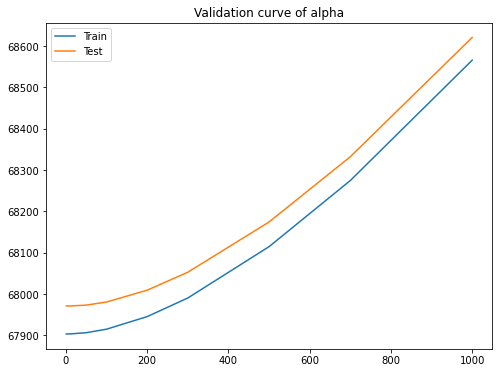

In [78]:
ridge=Ridge(random_state=42)
param_name='alpha'
param_range = [1,10,50,100,200,300,500,700,1000]
#param_range=[1,10,100,800,900,1000,1200,1400,1600,1800,2000]
#scoring='r2'
scoring='neg_mean_squared_error'
curve=validation_curve(ridge,data_prepared,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)

n=len(param_range)
'''if scoring=='r2':
    train_score=[curve[0][i].mean() for i in range (0,n)]
    test_score=[curve[1][i].mean() for i in range (0,n)]
elif scoring=='neg_mean_squared_error':
    train_score=[np.sqrt(-curve[0][i].mean()) for i in range (0,n)]
    test_score=[np.sqrt(-curve[1][i].mean()) for i in range (0,n)]
    '''

plot_validation_curve(curve,param_range,param_name,scoring)


From above plot It can be seen that Train and Test scores are almost after alpha=700.

Even at alpha=0, difference between RMSE is not much, so there is no objectionable overfitting. As alpha is increased, bias is increasing and so the RMSE.

As linear regression is not overfitting the model, using Ridge regression is not necessary.

## Support Vector Regression
I have used this to use kernel trick with support vector machines and for polynomial features using RBF kernel.

In [79]:
from sklearn.svm import SVR

In [80]:
svr=SVR(degree=2)
param_grid={
    'C':[1,10,50,100]
}
scoring='r2'
grid=GridSearchCV(svr,param_grid,scoring=scoring,n_jobs=-1,cv=3,verbose=3)
grid.fit(data_prepared,data_labels)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    9.1s remaining:   45.9s
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  1.4min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.5min finished
C:\Users\Diogo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=2,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1, param_grid={'C': [1, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=3)

In [81]:
print(grid.best_params_)
#print(grid.best_score_)

{'C': 10}


In [82]:
svr=SVR(degree=2,C=10)
scores=cross_val_score(svr,data_prepared,data_labels,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.8787045011060869


## Decision Tree

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
dtr=DecisionTreeRegressor(random_state=42)
scores=cross_val_score(dtr,data_prepared,y_train,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.7571871948332872


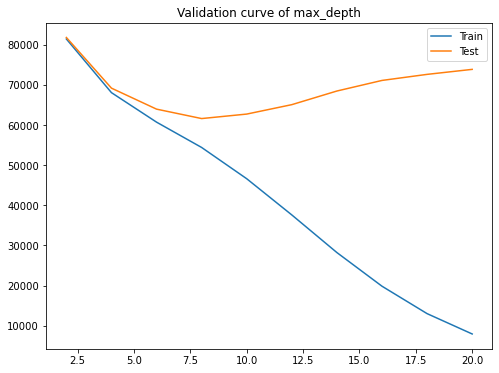

In [85]:
dtr=DecisionTreeRegressor(random_state=42)
param_name='max_depth'
param_range = range(2,21,2)
scoring='neg_mean_squared_error'
curve=validation_curve(dtr,data_prepared,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)

plot_validation_curve(curve,param_range,param_name,scoring)

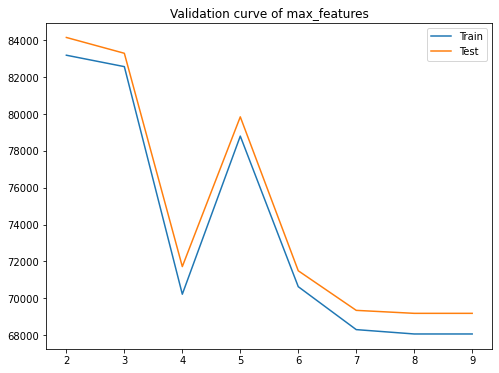

In [86]:
dtr=DecisionTreeRegressor(max_depth=4,random_state=42)
param_name='max_features'
param_range = range(2,10)
scoring='neg_mean_squared_error'
curve=validation_curve(dtr,data_prepared,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)
plot_validation_curve(curve,param_range,param_name,scoring)

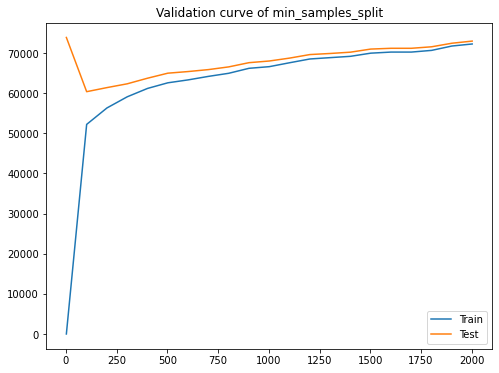

In [87]:
dtr=DecisionTreeRegressor(random_state=42)
param_name='min_samples_split'
param_range = range(2,2003,100)
scoring='neg_mean_squared_error'
curve=validation_curve(dtr,data_prepared,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)
plot_validation_curve(curve,param_range,param_name,scoring)

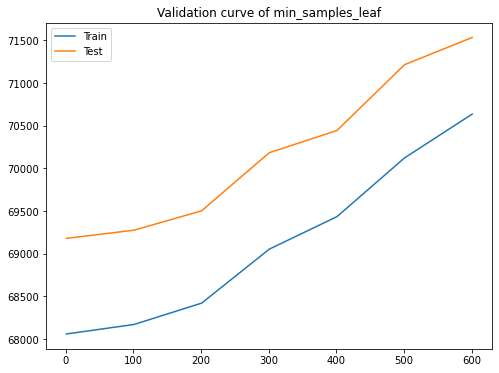

In [88]:
dtr=DecisionTreeRegressor(max_depth=4,random_state=42)
param_name='min_samples_leaf'
param_range = range(1,701,100)
scoring='neg_mean_squared_error'
curve=validation_curve(dtr,data_prepared,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)
plot_validation_curve(curve,param_range,param_name,scoring)

## Gradient Boosting Regression
I used this ensembling method to get the best model from decision trees.

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
gbr=GradientBoostingRegressor(random_state=42)
param_grid={
    'n_estimators':[100,500,1000],
    'max_depth':range(3,9,1),
    'max_features':[6,7,9],
    'min_samples_split':[200,400]  
}
scoring='r2'
grid=GridSearchCV(gbr,param_grid,scoring=scoring,n_jobs=-1,cv=3,verbose=1)
grid.fit(data_prepared,y_train)
print(grid.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 17.2min finished


{'max_depth': 8, 'max_features': 6, 'min_samples_split': 200, 'n_estimators': 100}


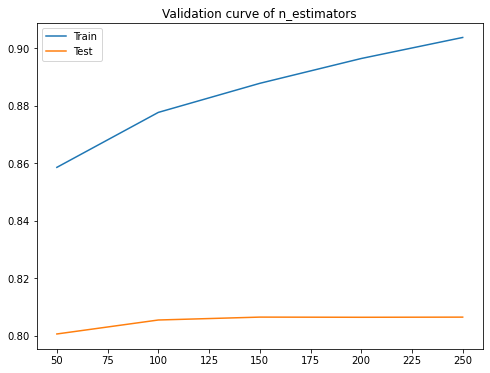

In [91]:
gbr=GradientBoostingRegressor(max_depth= 8, max_features=6, min_samples_split=200,random_state=42)
param_name='n_estimators'
param_range = range(50,251,50)
scoring='r2'
curve=validation_curve(gbr,data_prepared,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)
plot_validation_curve(curve,param_range,param_name,scoring)

In [92]:
gbr=GradientBoostingRegressor(max_depth= 8, max_features=6, min_samples_split=200, n_estimators=100,random_state=42)
scores=cross_val_score(gbr,data_prepared,y_train,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.8974790145435815


## Stacking
This is another ensembling method.

In this, I have used Linear regression 
and Gradient boosing regression as base models and Support Vector Regression as meta model.

In [95]:
from mlxtend.regressor import StackingRegressor

In [96]:
lr=LinearRegression()
svr=SVR(degree=2,C=10)
gbr=GradientBoostingRegressor(max_depth= 8, max_features=6, min_samples_split=200, n_estimators=100,random_state=42)

In [97]:
sr=StackingRegressor([lr,gbr],svr,verbose=3)
scores=cross_val_score(sr,data_prepared,data_labels,n_jobs=-1,cv=3,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.8920759836217282


## Final Model
I finalized following Gradient Boosing Regressor with following parameters:

n_estimators=100
max_depth=8
max_features=6
min_samples_split=200

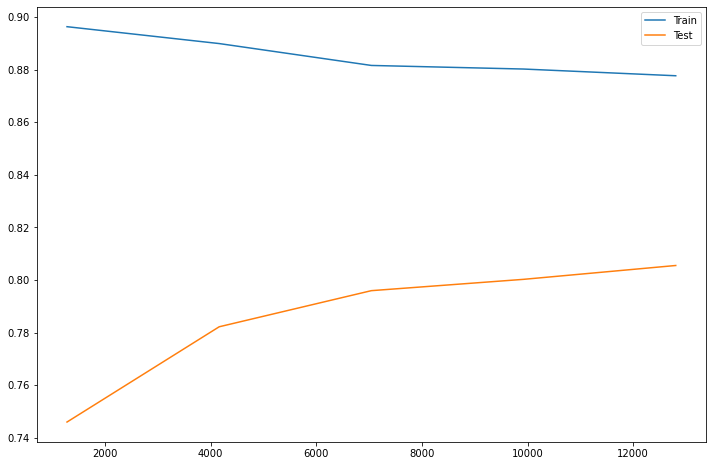

In [98]:
gbr=GradientBoostingRegressor(max_depth= 8, max_features=6, min_samples_split=200, n_estimators=100,random_state=42)
lc=learning_curve(gbr,data_prepared,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score,label='Train')
plt.plot(size,test_score,label="Test")
plt.legend()

From learning curve it is clear that this model is still overfitting. But, with the increase in number of samples, variance is decreasing.

So, getting more training data can be a solution for overfitting.

## Predicting on Test Set

In [99]:
test_data=pd.read_csv('strat_test_set.csv')
test_data_labels=test_data['median_house_value'].copy()
test_data.drop('median_house_value',axis=1,inplace=True)

In [100]:
fa=FeaturesAdder()
df_test=fa.fit_transform(test_data)

df_test=FeaturesTransformer().fit_transform(df_test)

#used 'transform' method, as I don't want to refit the standard scalar on test data.
df_test=data_cleaning_pipeline.transform(df_test)

df_test=pd.DataFrame(df_test,columns=l)

C:\Users\Diogo\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Diogo\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


In [101]:
#used 'transform' method, as I don't want to refit the standard scalar on test data.

y_test=test_data_labels.copy()
test_data_labels=label_scaler.transform(y_test.values.reshape(-1,1))

In [102]:
test_data_prepared=df_test[data_prepared.columns]

In [103]:
gbr=GradientBoostingRegressor(max_depth= 8, max_features=6, min_samples_split=200, n_estimators=100,random_state=42)
gbr.fit(data_prepared,data_labels)
train_pred=gbr.predict(data_prepared)
test_pred=gbr.predict(test_data_prepared)

C:\Users\Diogo\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [104]:

mse=mean_squared_error(y_train,label_scaler.inverse_transform(train_pred))
rmse=np.sqrt(mse)
print('train error:',rmse)
mse=mean_squared_error(y_test,label_scaler.inverse_transform(test_pred))
rmse=np.sqrt(mse)
print('test error:',rmse)

train error: 39773.94783299169
test error: 49795.96894045239
